In [2]:
#importing the libraries
import moviepy.editor as mp
import librosa
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from moviepy.editor import VideoFileClip, concatenate_videoclips
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

In [3]:
# Extracting the audio from the video clip
# AudioExtract.py --Comment out in case you want to convert the video into audio
clip = mp.VideoFileClip("../data_extracted/videos/training1.mp4")
clip.audio.write_audiofile("../data_extracted/videos/audio1.wav")

MoviePy - Writing audio in ../data_extracted/videos/audio1.wav


MoviePy - Done.


In [69]:
from scipy.io.wavfile import read as read_wav
sampling_rate, data=read_wav("../data_extracted/videos/audio1.wav") # enter your filename
print(sampling_rate)

44100


In [28]:
# P.S. It takes a lot of time to execute as there are a lot of chunks created due to 30 second window

# audio_file = "D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/audio1.wav"
audio_file = "../data_extracted/videos/audio1.wav"
z, sample_rate = librosa.load(audio_file, sr = 16000)
int(librosa.get_duration(z, sample_rate) / 60)

# Create chunks for 30 secs
time_slice = 1
window_length = time_slice * sample_rate
amplitude = z [21 * window_length : 22 * window_length]
ipd.Audio(amplitude, rate = sample_rate)

# Calculate the energy
energy = sum(abs(amplitude ** 2))
print(energy)

# Calculate the energy for each chunk
energy = np.array([sum(abs(z[i:i + window_length] ** 2)) for i in range(0, len(z), window_length)])

1.492565389829586


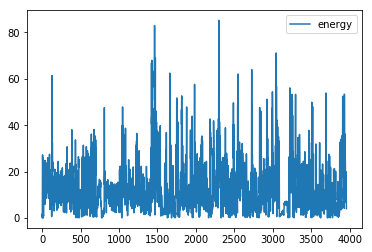

In [29]:
#plot energy based on amplitude of the audio file
plt.plot(energy, label='energy')
plt.legend()
plt.show()

In [27]:
import aubio
import matplotlib.pyplot as plt
filename = "../data_extracted/videos/audio1.wav"
chuncksize=5 
sample_rate=16000
downsample = 1
Fs = sample_rate
win_s = chuncksize * Fs  # fft size
hop_s = chuncksize * Fs  # hop size

s = aubio.source(filename, sample_rate, hop_s)
samplerate = s.samplerate

tolerance = 0.8

pitch_o = aubio.pitch("yin", win_s, hop_s, samplerate)
pitch_o.set_unit("midi")
pitch_o.set_tolerance(tolerance)

pitches = []
confidences = []

total_frames = 0
while True:
    samples, read = s()
    pitch = pitch_o(samples)[0]
    confidence = pitch_o.get_confidence()
    if pitch < 0: pitch = 0
    pitches += [pitch]
    confidences += [confidence]
    total_frames += read
    if read < hop_s: break


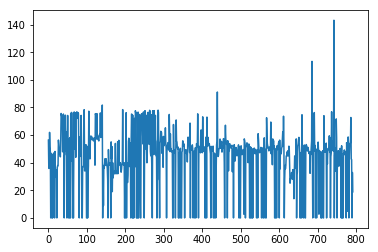

In [31]:
plt.plot(pitches)

In [59]:
def smooth(x,beta):
     """ kaiser window smoothing """
     window_len=11
     # extending the data at beginning and at the end
     # to apply the window at the borders
     s = np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
     w = np.kaiser(window_len,beta)
     y = np.convolve(w/w.sum(),s,mode='valid')
     return y[5:len(y)-5]

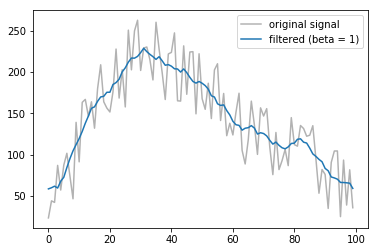

In [66]:
y = np.random.random(100)*100 
for i in range(100):
     y[i]=y[i]+i**((150-i)/80.0) # modifies the trend

# smoothing the data
plt.figure(1)
plt.plot(y,'-k',label="original signal",alpha=.3)
for b in beta:
     yy = smooth(y,b) 
     plt.plot(yy,label="filtered (beta = "+str(b)+")")
plt.legend()
plt.show()

In [61]:
len(yy), len(y)

(100, 100)

In [6]:
# Create a dataframe for energy data
energy_data = pd.DataFrame(columns=['Energy_Value', 'Start_time', 'End_time'])

# decide threshold based on the plot mentioned above. In our case it's somewhere above 500
threshold = 540
row_index = 0

for i in range(len(energy)):
    value = energy[i]
    if value >= threshold:
        i = np.where(energy == value)[0]
        energy_data.loc[row_index, 'Energy_Value'] = value
        energy_data.loc[row_index, 'Start_time'] = i[0] * 30
        energy_data.loc[row_index, 'End_time'] = (i[0] + 1) * 30
        row_index = row_index + 1

# create the excitement snippet
temp = []
k = 0
l= 0
q = len(energy_data) - 2
r = len(energy_data) - 1
while (k <= q):
    l = k + 1
    while (l <= r):
        if (energy_data['End_time'][k] == energy_data['Start_time'][l]):
            energy_data.loc[k, 'End_time'] = energy_data.loc[l, 'End_time']
            temp.append(l)
            l = l + 1
        else:
            k = l
            break
energy_data.drop(temp, axis=0, inplace=True)
print(energy_data)


132

In [33]:
np.reshape([1,1,1,1],(2,3))

ValueError: cannot reshape array of size 4 into shape (2,3)

In [8]:
# Create a dataframe for energy data
energy_data = pd.DataFrame(columns=['Energy_Value', 'Start_time', 'End_time'])

# decide threshold based on the plot mentioned above. In our case it's somewhere above 500
threshold = 540
row_index = 0

for i in range(len(energy)):
    value = energy[i]
    if value >= threshold:
        i = np.where(energy == value)[0]
        energy_data.loc[row_index, 'Energy_Value'] = value
        energy_data.loc[row_index, 'Start_time'] = i[0] * 30
        energy_data.loc[row_index, 'End_time'] = (i[0] + 1) * 30
        row_index = row_index + 1

# create the excitement snippet
temp = []
k = 0
l= 0
q = len(energy_data) - 2
r = len(energy_data) - 1
while (k <= q):
    l = k + 1
    while (l <= r):
        if (energy_data['End_time'][k] == energy_data['Start_time'][l]):
            energy_data.loc[k, 'End_time'] = energy_data.loc[l, 'End_time']
            temp.append(l)
            l = l + 1
        else:
            k = l
            break
energy_data.drop(temp, axis=0, inplace=True)
print(energy_data)


   Energy_Value Start_time End_time
0       790.962       1410     1500
3       609.151       1650     1680
4       658.806       1740     1770
5       722.347       1800     1830
6       642.954       2070     2100
7       579.154       2220     2250
8       874.289       2280     2310
9       597.352       2520     2550
10      643.172       2580     2610
11      579.677       2820     2850
12       560.36       2910     2940
13      727.736       2970     3000
14      874.896       3030     3060
15      721.962       3210     3270
17      879.846       3900     3960


In [9]:
start_highlight = np.array(energy_data['Start_time'])
end_highlight = np.array(energy_data['End_time'])
for i in range(len(energy_data)):
    if i != 0:
        start_lim = start_highlight[i] - 50
    else:
        start_lim = start_highlight[i]
    end_lim = end_highlight[i]
    filename = "training_highlight" + str(i + 1) + ".mp4"
    ffmpeg_extract_subclip("D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/training1.mp4", start_lim, end_lim, targetname=filename)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join

In [10]:
clip1 = VideoFileClip("C:/Users/shipr/training_highlight1.mp4")
clip2 = VideoFileClip("C:/Users/shipr/training_highlight2.mp4")
clip3 = VideoFileClip("C:/Users/shipr/training_highlight3.mp4")
clip4 = VideoFileClip("C:/Users/shipr/training_highlight4.mp4")
clip5 = VideoFileClip("C:/Users/shipr/training_highlight5.mp4")
clip6 = VideoFileClip("C:/Users/shipr/training_highlight6.mp4")
clip7 = VideoFileClip("C:/Users/shipr/training_highlight7.mp4")
clip8 = VideoFileClip("C:/Users/shipr/training_highlight8.mp4")
clip9 = VideoFileClip("C:/Users/shipr/training_highlight9.mp4")
clip10 = VideoFileClip("C:/Users/shipr/training_highlight10.mp4")
clip11 = VideoFileClip("C:/Users/shipr/training_highlight11.mp4")
clip12 = VideoFileClip("C:/Users/shipr/training_highlight12.mp4")
clip13 = VideoFileClip("C:/Users/shipr/training_highlight13.mp4")
clip14 = VideoFileClip("C:/Users/shipr/training_highlight14.mp4")
clip15 = VideoFileClip("C:/Users/shipr/training_highlight15.mp4")

final_clip = concatenate_videoclips([clip1,clip2,clip3,clip4,clip5,clip6,clip7,clip8,clip9,clip10,clip11,clip12,clip13,clip14,clip15])

final_clip.write_videofile("D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/training1_amplitudeHighlight.mp4")


Moviepy - Building video D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/training1_amplitudeHighlight.mp4.
MoviePy - Writing audio in training1_amplitudeHighlightTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/training1_amplitudeHighlight.mp4



Moviepy - Done !
Moviepy - video ready D:/MS_TUD/MMSR/TrainingData/data_extracted/videos/training1_amplitudeHighlight.mp4
